# <center>Exploring Patient Demographics and Surgical Economics<center>

## Introduction:

IDB provides users with the best available information on the burden and characteristic of the main groups of injuries, e.g. defined by age and sex, type and mechanism of injuries, intent and setting in which they occur (home, school, sport, leisure, work and road).


In this analysis, we aim to explore the dataset provided by XYZ Medical Solutions. The data is sourced from various sheets in an Excel file, including information on patients, encounters, surgical costs, surgical encounters, and departments.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Data:
We begin by importing the necessary libraries and mounting Google Drive to access the dataset. The data is loaded into a Pandas DataFrame for further analysis.

In [ ]:
# Load each sheet from the Excel file
file_path = "/content/drive/MyDrive/Jenina_Projects/IDB_Analytics/IDB_Analytics_data.xlsx"

# Load Patients sheet
patients_df = pd.read_excel(file_path, sheet_name='Patients')

# Load Encounters sheet
encounters_df = pd.read_excel(file_path, sheet_name='Encounters')

# Load SurgicalCosts sheet
surgical_costs_df = pd.read_excel(file_path, sheet_name='SurgicalCosts')

# Load SurgicalEncounters sheet
surgical_encounters_df = pd.read_excel(file_path, sheet_name='SurgicalEncounters')

# Load Departments sheet
departments_df = pd.read_excel(file_path, sheet_name='Departments')


In [ ]:
# Display the first few rows of each DataFrame to understand their structure
print("Patients Sheet:")
patients_df.head()

Patients Sheet:


,Master Patient ID,Patient City,Patient Zip Code,Patient County,Patient State,Patient Country,Patient Gender,Patient Geography Loaded,Patient DOB,Patient Marital Status,Patient Primary Language,Patient Is Citizen Flag,Patient Is Deceased Flag,Patient Ethnicity
0,100000,Feasterville-Trevose,19053,Bucks,PA,US,Male,Yes,12/26/1963 0:00,Other,NaN,N,N,Hispanic or Latino
1,100001,Morrisville,19067,Bucks,PA,US,Female,Yes,9/13/1960 0:00,Other,ENGLISH,N,N,White
2,100002,Richboro,18954,Bucks,PA,US,Female,Yes,1/12/1968 0:00,Other,NaN,N,N,Hispanic or Latino
3,100003,Richboro,18954,Bucks,PA,US,Female,Yes,9/20/1960 0:00,Single,ENGLISH,N,N,White
4,100004,Warminster,18974,Bucks,PA,US,Male,Yes,5/26/1972 0:00,Other,ENGLISH,N,N,White


In [ ]:
print("\nEncounters Sheet:")
encounters_df.head()


Encounters Sheet:


,Master Patient ID,Patient Encounter ID,Patient Admission Datetime,Patient LOS,Admitting Provider ID,Discharging Provider ID,Attending Provider ID,Patient Discharge Datetime,Department ID,Hospital Account ID,Patient InICU Flag,Patient Admitted Flag,Patient Readmission Flag,Patient Inpatient Readmission Flag
0,100000,1854663,6/7/2016 17:24,2,5061,4623,4909,6/9/2016 19:45,22100062,11311443.0,No,Yes,No,No
1,100001,2570046,12/6/2015 8:27,7,3701,3614,3466,12/13/2015 10:31,22100051,11428274.0,No,Yes,No,No
2,100002,101,7/24/2015 7:05,0,4821,4533,4658,7/24/2015 23:59,22100065,11211365.0,No,Yes,No,No
3,100003,2690640,1/28/2016 15:25,1,7521,7353,7839,1/29/2016 17:33,22100054,11500203.0,No,Yes,No,No
4,100003,3473087,1/2/2017 14:46,2,5061,5055,5326,1/4/2017 11:00,22100050,11328449.0,No,Yes,No,No


In [ ]:
print("\nSurgicalCosts Sheet:")
surgical_costs_df.head()


SurgicalCosts Sheet:


,Surgery ID,Surgical Cost ID,Surgical Resource Name,Surgical Resource Type,Surgical Resource Cost
0,1,1,CEREDASE,DrugMap,6090.107371
1,1,2,WARD D2,Units,319.872551
2,1,3,CLINIC OF ONCOLOGY,Units,113.224549
3,1,4,1,OR Suite,115.582231
4,1,5,1,Anaesthetics,470.216927


In [ ]:
print("\nSurgicalEncounters Sheet:")
surgical_encounters_df.head()


SurgicalEncounters Sheet:


,Master Patient ID,Surgery ID,Surgical Admission Date,Surgical Discharge Date,Surgical DRG Description,Surgical Type,Surgical Total Cost,Surgical Total Profit,Surgical Unit Name,Surgical Admission Type,Surgical Admission Desecription,Surgical Admission Group,Surgical Discharge Type,Surgical Discharge Description,Surgeon ID,Surgical Specialty
0,100000,7251,7/31/2016,8/9/2016,Electrophysiological and other Percutaneous Ca...,NonElective,2145.825787,897.174213,F6 - MEDICINE1 - RESPIRATORY,Emergency,Accident and emergency or dental casualty depa...,"Emergency admission, when admission is unpredi...",Clinical Advice / consent,Patient discharged on clinical advice or with ...,4009,340 - Respiratory Medicine
1,100000,7075,11/19/2016,11/25/2016,Chronic Obstructive Pulmonary Disease or Bronc...,NonElective,1641.373677,67.626323,F6 - MEDICINE1 - RESPIRATORY,Emergency,Accident and emergency or dental casualty depa...,"Emergency admission, when admission is unpredi...",Clinical Advice / consent,Patient discharged on clinical advice or with ...,4018,340 - Respiratory Medicine
2,100000,7423,12/9/2016,12/16/2016,Chronic Obstructive Pulmonary Disease or Bronc...,NonElective,1861.706672,-152.706672,F6 - MEDICINE1 - RESPIRATORY,Emergency,Accident and emergency or dental casualty depa...,"Emergency admission, when admission is unpredi...",NaN,NaN,4025,340 - Respiratory Medicine
3,100001,6622,10/2/2016,10/3/2016,Pulmonary Embolis w cc,NonElective,215.570923,3864.429077,D5 - MEDICINE - CARDIOLOGY,Emergency,Accident and emergency or dental casualty depa...,"Emergency admission, when admission is unpredi...",NaN,NaN,4019,320 - Cardiology
4,100002,5767,3/6/2017,3/10/2017,Acute Myocardial Infarction w/o cc,NonElective,1967.838138,1143.161862,D5 - MEDICINE - CARDIOLOGY,Emergency,Accident and emergency or dental casualty depa...,"Emergency admission, when admission is unpredi...",Clinical Advice / consent,Patient discharged on clinical advice or with ...,4007,320 - Cardiology


In [ ]:
surgical_encounters_df.rename(columns={'Surgical Admission Desecription': 'Surgical Admission Description'}, inplace=True)

In [ ]:
print("\nDepartments Sheet:")
departments_df.head()


Departments Sheet:


,Department Name,Department ID,Hospital ID,Specialty Description,Hospital Name,Hospital City,Hospital Zip Code,Hospital County,Hospital State,Hospital Country
0,300-PEDS-ONCOLOGY,22100033,9900006,Oncology,Rothman Specialty Hospital,Bensalem,19020,Bucks,PA,US
1,CARDIAC,22100051,115000,Cardiology,Albert Einstein Medical Center,Philadelphia,19103,Philadelphia,PA,US
2,CARDIAC CATH LAB,22100056,115000,Cardiology,Albert Einstein Medical Center,Philadelphia,19103,Philadelphia,PA,US
3,CARDIO PULMONARY,22100016,111000,Cardiology,General Hospital,Philadelphia,19141,Philadelphia,PA,US
4,CATH LAB,22100017,111000,Cardiology,General Hospital,Philadelphia,19141,Philadelphia,PA,US


# Analysis and Insights:

Now that we have loaded the data into separate DataFrames for each sheet, we can delve into the analysis to extract meaningful insights.

### Patients Sheet:
The Patients sheet provides information on the demographics of individuals who underwent surgical procedures. We can explore the distribution of patient demographics such as age, gender, and geography to identify patterns and trends.

In [ ]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7096 entries, 0 to 7095
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Master Patient ID         7096 non-null   int64 
 1   Patient City              7096 non-null   object
 2   Patient Zip Code          7096 non-null   int64 
 3   Patient County            7096 non-null   object
 4   Patient State             7096 non-null   object
 5   Patient Country           7096 non-null   object
 6   Patient Gender            7096 non-null   object
 7   Patient Geography Loaded  7096 non-null   object
 8   Patient DOB               6787 non-null   object
 9   Patient Marital Status    7083 non-null   object
 10  Patient Primary Language  2240 non-null   object
 11  Patient Is Citizen Flag   7096 non-null   object
 12  Patient Is Deceased Flag  7096 non-null   object
 13  Patient Ethnicity         7096 non-null   object
dtypes: int64(2), object(12)


In [ ]:
# Encode missing values with a new category label
patients_df['Patient Marital Status']=patients_df['Patient Marital Status'].fillna('Unknown', inplace=True)

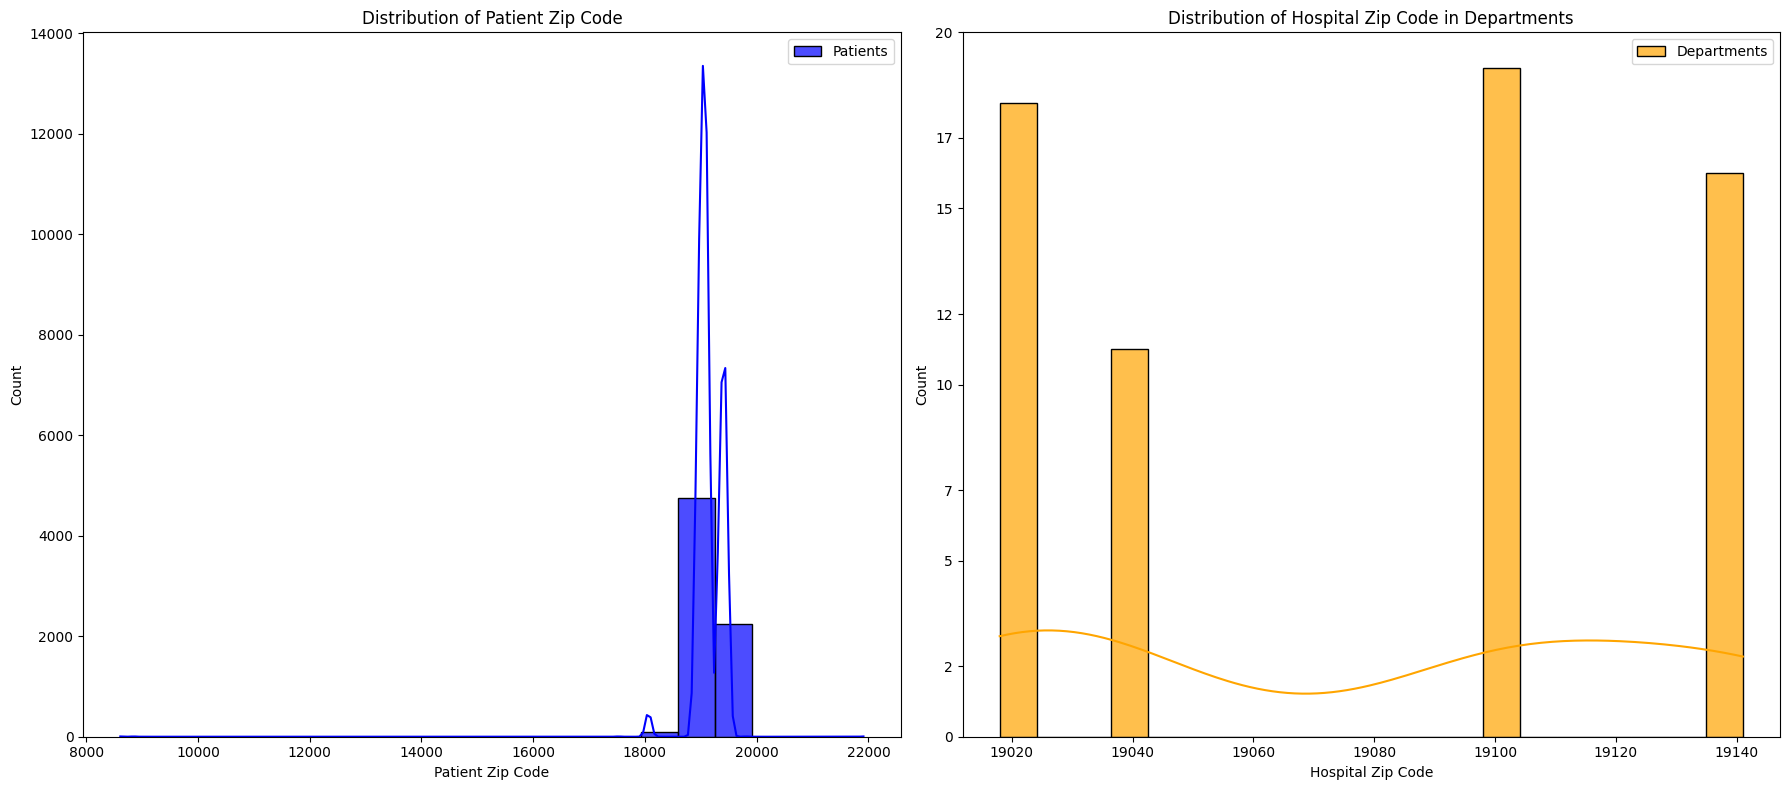

In [ ]:
numerical_cols = ['Patient Zip Code', 'Hospital Zip Code']

plt.figure(figsize=(18, 8))

# Plot for Patient Zip Code distribution
plt.subplot(1, 2, 1)
sns.histplot(patients_df['Patient Zip Code'], bins=20, kde=True, label='Patients', color='blue', alpha=0.7)
plt.title('Distribution of Patient Zip Code')
plt.xlabel('Patient Zip Code')
plt.ylabel('Count')
plt.legend()

# Plot for Hospital Zip Code distribution in the 'Departments' sheet
plt.subplot(1, 2, 2)
sns.histplot(departments_df['Hospital Zip Code'], bins=20, kde=True, label='Departments', color='orange', alpha=0.7)
plt.title('Distribution of Hospital Zip Code in Departments')
plt.xlabel('Hospital Zip Code')
plt.ylabel('Count')

# Convert y-axis ticks to integers
plt.yticks([int(y) for y in plt.yticks()[0]])

plt.legend()
plt.tight_layout()
plt.show()

### Inconsistency
The given data shows that the Hospitals considered for analysis are located in US and the patients' state and country names also denote the same. However, the zip codes belong to Germany, EU.

## Demographic Profile of Patients Undergoing Surgical Procedures:

This code merges the 'Patients' and 'SurgicalEncounters' DataFrames based on the 'Master Patient ID' and visualizes the age, gender, and ethnicity distributions of patients undergoing surgical procedures.

In [ ]:
# Merge 'Patients' and 'SurgicalEncounters' DataFrames on 'Master Patient ID'
merged_df = pd.merge(patients_df, surgical_encounters_df, on='Master Patient ID')
merged_df

,Master Patient ID,Patient City,Patient Zip Code,Patient County,Patient State,Patient Country,Patient Gender,Patient Geography Loaded,Patient DOB,Patient Marital Status,...,Surgical Total Cost,Surgical Total Profit,Surgical Unit Name,Surgical Admission Type,Surgical Admission Description,Surgical Admission Group,Surgical Discharge Type,Surgical Discharge Description,Surgeon ID,Surgical Specialty
0,100000,Feasterville-Trevose,19053,Bucks,PA,US,Male,Yes,12/26/1963 0:00,Other,...,2145.825787,897.174213,F6 - MEDICINE1 - RESPIRATORY,Emergency,Accident and emergency or dental casualty depa...,"Emergency admission, when admission is unpredi...",Clinical Advice / consent,Patient discharged on clinical advice or with ...,4009,340 - Respiratory Medicine
1,100000,Feasterville-Trevose,19053,Bucks,PA,US,Male,Yes,12/26/1963 0:00,Other,...,1641.373677,67.626323,F6 - MEDICINE1 - RESPIRATORY,Emergency,Accident and emergency or dental casualty depa...,"Emergency admission, when admission is unpredi...",Clinical Advice / consent,Patient discharged on clinical advice or with ...,4018,340 - Respiratory Medicine
2,100000,Feasterville-Trevose,19053,Bucks,PA,US,Male,Yes,12/26/1963 0:00,Other,...,1861.706672,-152.706672,F6 - MEDICINE1 - RESPIRATORY,Emergency,Accident and emergency or dental casualty depa...,"Emergency admission, when admission is unpredi...",NaN,NaN,4025,340 - Respiratory Medicine
3,100001,Morrisville,19067,Bucks,PA,US,Female,Yes,9/13/1960 0:00,Other,...,215.570923,3864.429077,D5 - MEDICINE - CARDIOLOGY,Emergency,Accident and emergency or dental casualty depa...,"Emergency admission, when admission is unpredi...",NaN,NaN,4019,320 - Cardiology
4,100002,Richboro,18954,Bucks,PA,US,Female,Yes,1/12/1968 0:00,Other,...,1967.838138,1143.161862,D5 - MEDICINE - CARDIOLOGY,Emergency,Accident and emergency or dental casualty depa...,"Emergency admission, when admission is unpredi...",Clinical Advice / consent,Patient discharged on clinical advice or with ...,4007,320 - Cardiology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8970,106056,Collegeville,19426,Montgomery,PA,US,Female,Yes,1/26/1964 0:00,Other,...,1644.164135,404.835865,D5 - MEDICINE - CARDIOLOGY,Emergency,Accident and emergency or dental casualty depa...,"Emergency admission, when admission is unpredi...",Clinical Advice / consent,Patient discharged on clinical advice or with ...,4031,320 - Cardiology
8971,106057,Collegeville,19426,Montgomery,PA,US,Male,Yes,10/5/1964 0:00,Other,...,266.502895,2844.497105,D5 - MEDICINE - CARDIOLOGY,Emergency,Accident and emergency or dental casualty depa...,"Emergency admission, when admission is unpredi...",Clinical Advice / consent,Patient discharged on clinical advice or with ...,4031,320 - Cardiology
8972,106058,Collegeville,19426,Montgomery,PA,US,Female,Yes,7/21/1951 0:00,Other,...,236.407591,224.592409,L&D 2 East,Maternity,Admitted ante-partum,"Maternity admission, of a pregnant or recently...",Clinical Advice / consent,Patient discharged on clinical advice or with ...,4012,501 - Obstetrics
8973,106059,Collegeville,19426,Montgomery,PA,US,Male,Yes,7/1/1940 0:00,Other,...,1648.127513,1462.872487,D5 - MEDICINE - CARDIOLOGY,Emergency,Accident and emergency or dental casualty depa...,"Emergency admission, when admission is unpredi...",Clinical Advice / consent,Patient discharged on clinical advice or with ...,4031,320 - Cardiology


In [ ]:
import pandas as pd
from datetime import datetime

# Assuming 'Patient DOB' is in datetime format, if not, convert it to datetime first
merged_df['Patient DOB'] = pd.to_datetime(merged_df['Patient DOB'], errors='coerce')

# Calculate age
current_date = datetime.now()
merged_df['Patient Age'] = (current_date - merged_df['Patient DOB']).astype('<m8[Y]')

merged_df['Patient Age'].describe()

count    8477.000000
mean       66.246432
std        17.210363
min        20.000000
25%        53.000000
50%        65.000000
75%        77.000000
max       118.000000
Name: Patient Age, dtype: float64

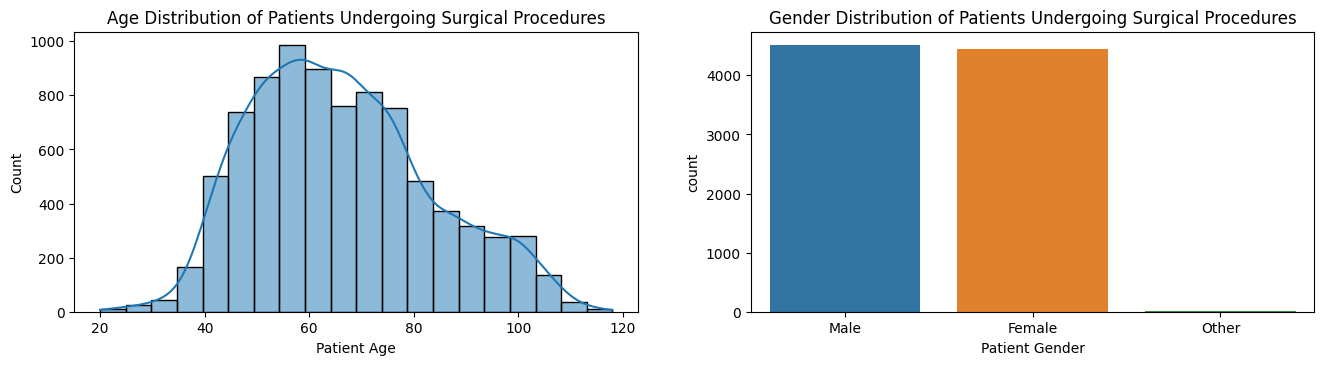

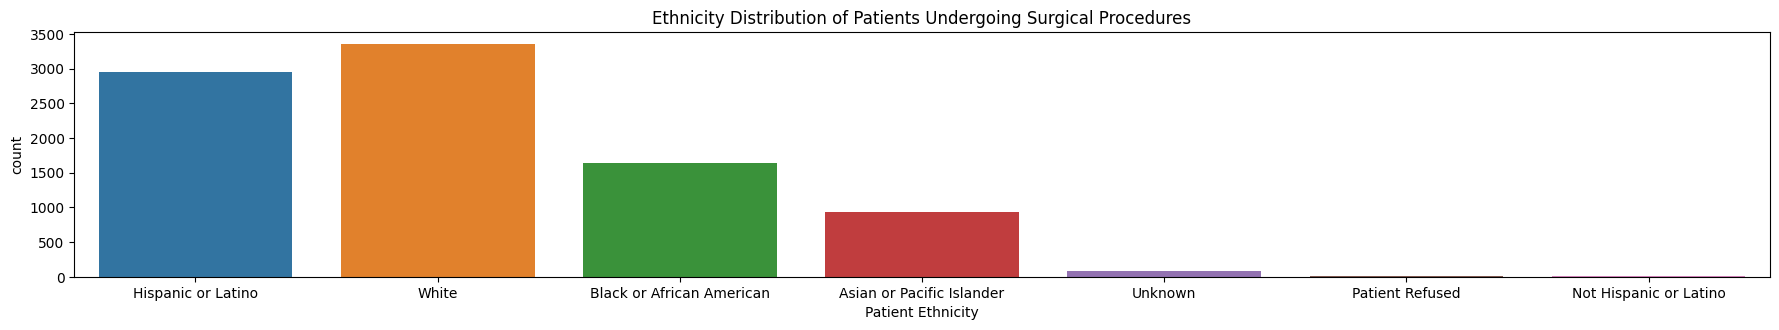

In [ ]:
# Demographic profile analysis
plt.figure(figsize=(16, 8))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(merged_df['Patient Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients Undergoing Surgical Procedures')

# Gender distribution
plt.subplot(2, 2, 2)
sns.countplot(x='Patient Gender', data=merged_df)
plt.title('Gender Distribution of Patients Undergoing Surgical Procedures')

# Ethnicity distribution
plt.figure(figsize=(35, 6))
plt.subplot(2, 2, 3)
sns.countplot(x='Patient Ethnicity', data=merged_df)
plt.title('Ethnicity Distribution of Patients Undergoing Surgical Procedures')

plt.tight_layout()
plt.show()

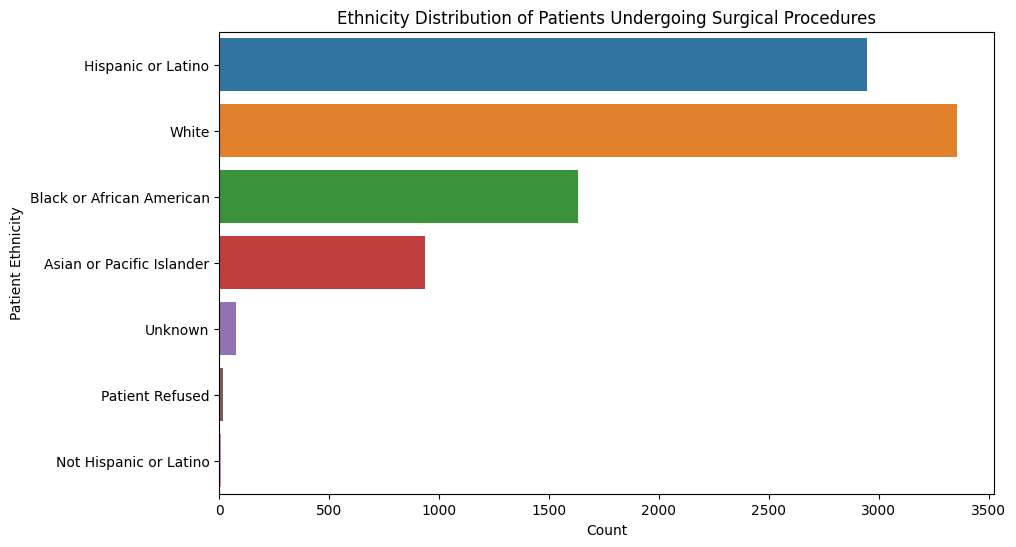

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y='Patient Ethnicity', data=merged_df)
plt.title('Ethnicity Distribution of Patients Undergoing Surgical Procedures')
plt.xlabel('Count')
plt.ylabel('Patient Ethnicity')
plt.show()


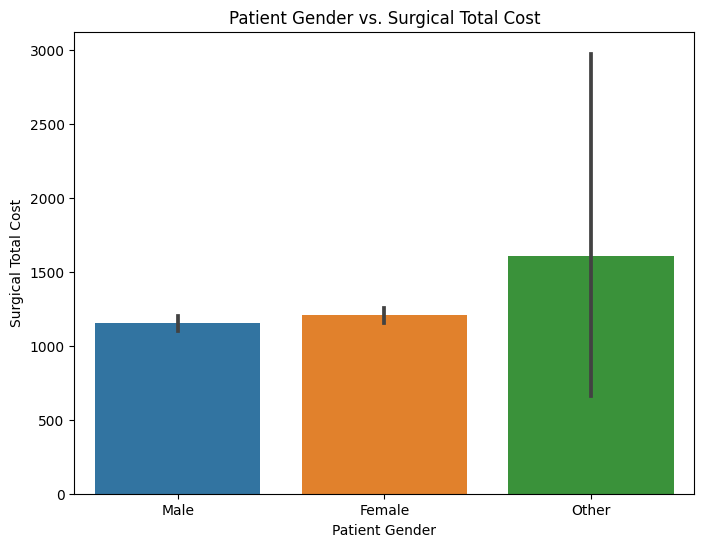

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(8, 6))
sns.barplot(x='Patient Gender', y='Surgical Total Cost', data=merged_df)
plt.title('Patient Gender vs. Surgical Total Cost')
plt.xlabel('Patient Gender')
plt.ylabel('Surgical Total Cost')
plt.show()

In [ ]:
# Merge 'Patients', 'SurgicalEncounters', and 'SurgicalCosts' DataFrames
merged_profit_df = pd.merge(merged_df, surgical_costs_df, on='Surgery ID')

# Create age bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
merged_profit_df['Age Group'] = pd.cut(merged_profit_df['Patient Age'], bins=age_bins)

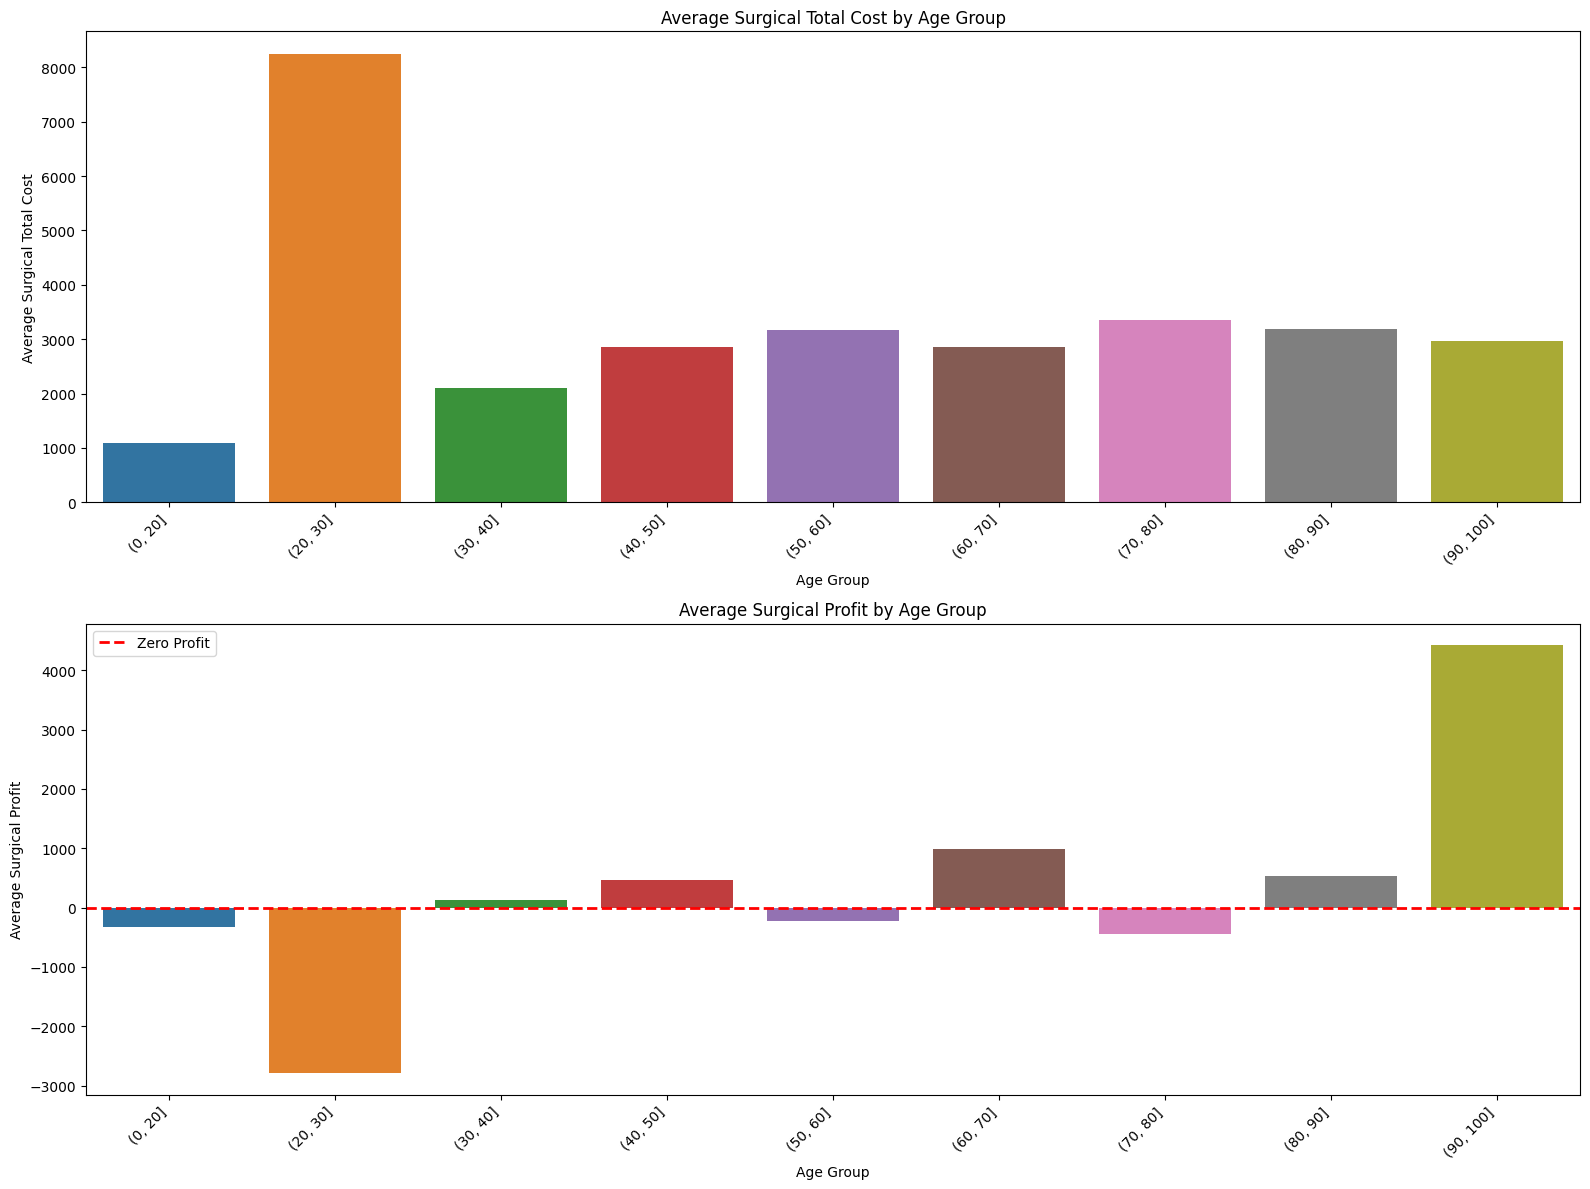

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create age bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
merged_profit_df['Age Group'] = pd.cut(merged_profit_df['Patient Age'], bins=age_bins)

# Calculate average surgical total cost and profit for each age group
average_costs = merged_profit_df.groupby('Age Group')['Surgical Total Cost'].mean().reset_index()
average_profits = merged_profit_df.groupby('Age Group')['Surgical Total Profit'].mean().reset_index()

# Create subplots
plt.figure(figsize=(16, 12))

# Bar plot for average surgical total cost by age group
plt.subplot(2, 1, 1)
sns.barplot(x='Age Group', y='Surgical Total Cost', data=average_costs)
plt.title('Average Surgical Total Cost by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Surgical Total Cost')
plt.xticks(rotation=45, ha='right')

# Bar plot for average surgical profit by age group
plt.subplot(2, 1, 2)
sns.barplot(x='Age Group', y='Surgical Total Profit', data=average_profits)
plt.title('Average Surgical Profit by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Surgical Profit')
plt.xticks(rotation=45, ha='right')

# Draw a horizontal line at zero profit
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Profit')

plt.legend()
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

## Inference through Analytics:

**I. Age Distribution Analysis:**

- The age distribution of patients undergoing surgical procedures indicates a prominent **peak between the ages of 50 and 60**, forming a **bell-shaped** curve. This suggests that the majority of patients fall within this age range.
  
**Marketing Insight:** The **concentration of patients in the 50 to 60** age group presents an opportunity for targeted marketing towards this demographic, tailoring communication and promotional efforts to their specific healthcare needs and preferences.

**II. Gender Distribution Analysis:**

- The gender distribution of patients reveals a relatively equal representation of males and females undergoing surgical procedures. There is **no significant gender imbalance in seeking surgical interventions**, indicating that both genders are equally engaged in it.
  
**Marketing Insight:** Given the balanced distribution, **marketing strategies** can be designed to **appeal to both genders** without a specific focus on one over the other. **Gender-neutral messaging and promotions** may be effective in reaching the broad patient base.

**III. Ethnicity Distribution Analysis:**

- The ethnicity distribution highlights that the **regularly involved ethnic group is White**, with approximately 3400 patients. The second-highest ethnic group is **Hispanic or Latino**, with around 2950 patients.
  
**Marketing Insight:** Understanding the predominant ethnic groups enables targeted **marketing efforts that resonate with the cultural and healthcare needs of these specific populations**. Tailoring marketing materials, **language preferences, and cultural sensitivities** can enhance the effectiveness of outreach to diverse ethnic communities.

Overall, the EDA provides valuable insights into the demographic profile of patients undergoing surgical procedures. These insights can be leveraged for **targeted marketing campaigns**, ensuring that **promotional efforts** are well-aligned with the age, gender, and ethnicity characteristics of the patient population.

Additionally, the understanding of patient demographics can guide **regional marketing strategies**, allowing the company to focus on geographic areas with a higher demand for surgical products. The concentration of patients in the 50 to 60 age group suggests **potential growth areas**, and tailoring marketing strategies to diverse ethnic groups can contribute to the overall success of the company's expansion plans.


## Cities and States with Higher Demand for Surgical Products:
This code merges with the 'Encounters' DataFrame to get city and state information, then visualizes the top 10 cities and states with higher demand for surgical products.

In [ ]:
# Merge with 'Encounters' DataFrame to get city and state information
merged_encounters_df = pd.merge(merged_df, encounters_df, on='Master Patient ID')

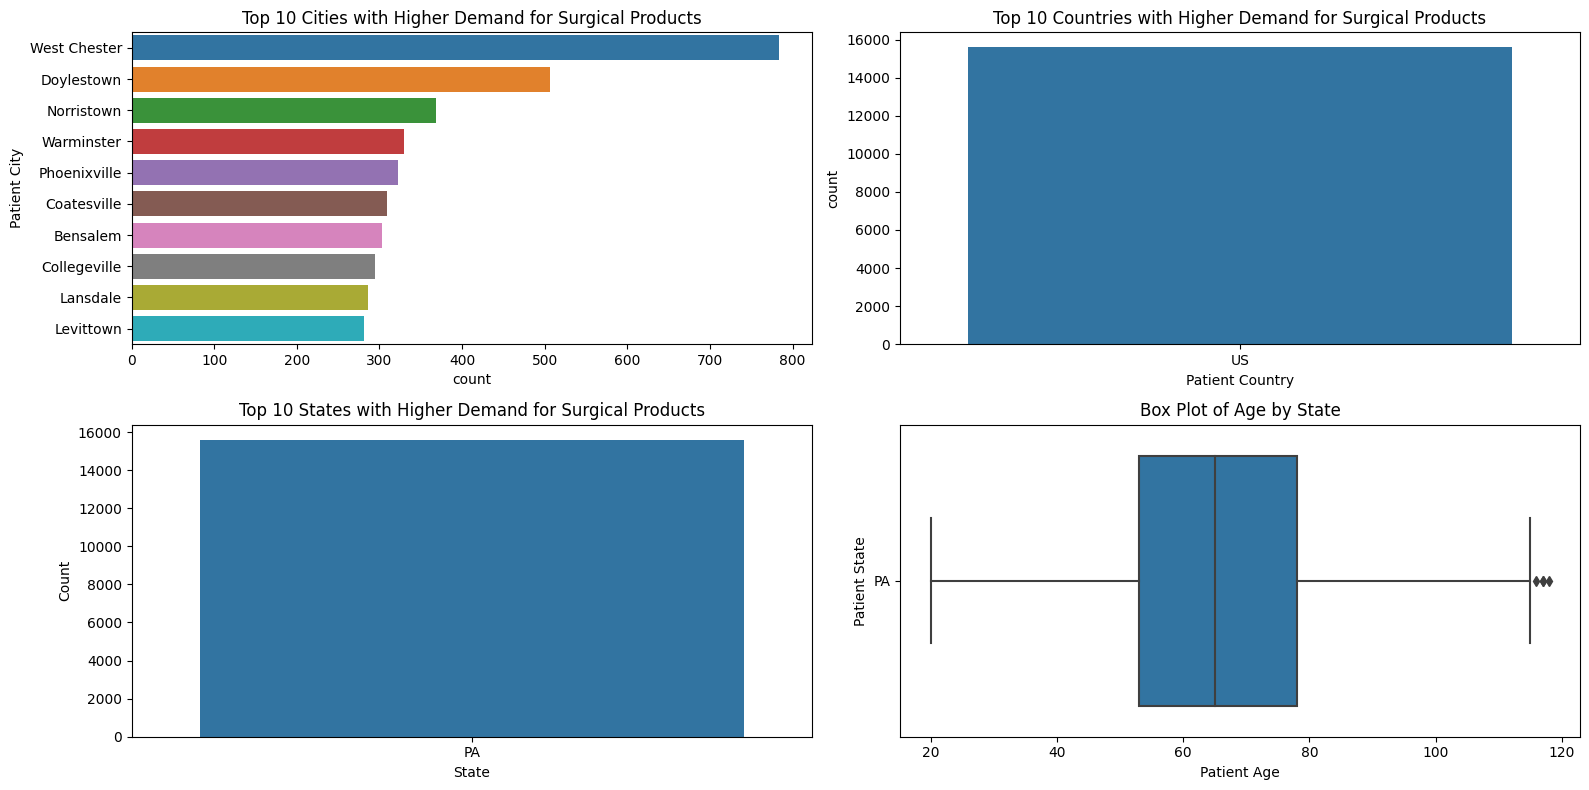

In [ ]:
# Analyze demand in cities and states
plt.figure(figsize=(16, 8))

# Demand in cities
plt.subplot(2, 2, 1)
sns.countplot(y='Patient City', data=merged_encounters_df, order=merged_encounters_df['Patient City'].value_counts().index[:10])
plt.title('Top 10 Cities with Higher Demand for Surgical Products')

# Demand in countries
plt.subplot(2, 2, 2)
sns.countplot(x='Patient Country', data=merged_encounters_df, order=patients_df['Patient Country'].value_counts().index[:10])
plt.title('Top 10 Countries with Higher Demand for Surgical Products')

# Analyze demand in states with a bar plot
plt.subplot(2, 2, 3)
sns.barplot(x=merged_encounters_df['Patient State'].value_counts().index[:10],
            y=merged_encounters_df['Patient State'].value_counts().values[:10])
plt.title('Top 10 States with Higher Demand for Surgical Products')
plt.xlabel('State')
plt.ylabel('Count')

# Box plot for states
plt.subplot(2, 2, 4)
sns.boxplot(y='Patient State', x='Patient Age', data=merged_encounters_df)
plt.title('Box Plot of Age by State')

plt.tight_layout()
plt.show()

<ipython-input-24-669a3005695b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr())


<Axes: >

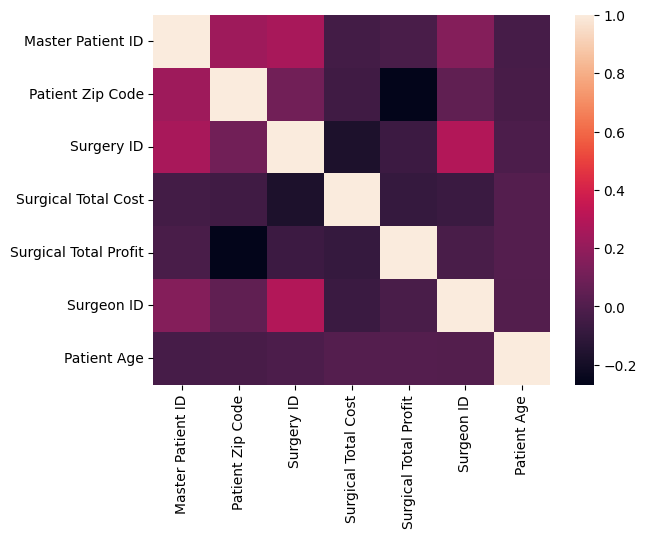

In [ ]:
sns.heatmap(merged_df.corr())

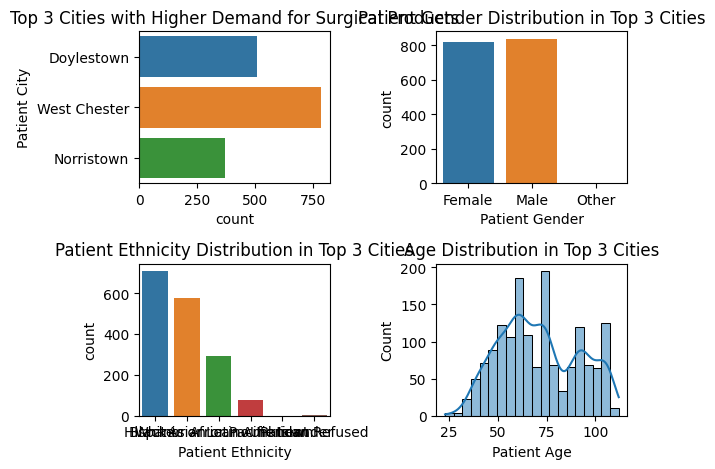

In [ ]:
# Demand in top 3 cities
top_cities = merged_encounters_df['Patient City'].value_counts().index[:3]

plt.subplot(2, 2, 1)
sns.countplot(y='Patient City', data=merged_encounters_df[merged_encounters_df['Patient City'].isin(top_cities)])
plt.title('Top 3 Cities with Higher Demand for Surgical Products')

# Subplot for Patient Gender distribution in top 3 cities
plt.subplot(2, 2, 2)
sns.countplot(x='Patient Gender', data=merged_encounters_df[merged_encounters_df['Patient City'].isin(top_cities)])
plt.title('Patient Gender Distribution in Top 3 Cities')

# Subplot for Patient Ethnicity distribution in top 3 cities
plt.subplot(2, 2, 3)
sns.countplot(x='Patient Ethnicity', data=merged_encounters_df[merged_encounters_df['Patient City'].isin(top_cities)])
plt.title('Patient Ethnicity Distribution in Top 3 Cities')

# Subplot for Age distribution in top 3 cities
plt.subplot(2, 2, 4)
sns.histplot(x='Patient Age', data=merged_encounters_df[merged_encounters_df['Patient City'].isin(top_cities)], bins=20, kde=True)
plt.title('Age Distribution in Top 3 Cities')

plt.tight_layout()

## Correlation Between Patient Demographics and Surgical Procedure Types:

This code visualizes the correlation between patient demographics (gender and ethnicity) and surgical procedure types.

In the context of surgical procedures, the terms "non-elective," "elective," and "day case" refer to different categories based on the urgency and nature of the surgery:

1. **Non-Elective Surgery (Emergency Surgery):**
   - **Definition:** Non-elective surgery, also known as emergency surgery, is a type of surgery that is performed urgently or on an emergency basis.
   - **Characteristics:**
     - Typically involves immediate or urgent medical need.
     - The surgery is essential for the patient's well-being or to address a life-threatening condition.
     - Examples include trauma surgery, appendectomy for acute appendicitis, or emergency procedures for internal bleeding.

2. **Elective Surgery:**
   - **Definition:** Elective surgery refers to planned, non-emergency surgical procedures that are scheduled in advance.
   - **Characteristics:**
     - The surgery is scheduled based on the patient's and surgeon's availability.
     - It is not performed as an immediate response to a life-threatening condition.
     - Examples include joint replacement surgeries, cosmetic surgeries, or scheduled hernia repairs.

3. **Day Case Surgery (Ambulatory or Outpatient Surgery):**
   - **Definition:** Day case surgery, also known as ambulatory or outpatient surgery, involves procedures where the patient is admitted to the hospital or surgical facility, undergoes the surgery, and is discharged on the same day.
   - **Characteristics:**
     - The patient does not stay overnight in the hospital.
     - Procedures are typically less complex and do not require extended recovery.
     - Examples include certain types of minor surgeries, diagnostic procedures, or dental surgeries.

These categories help in classifying surgeries based on their urgency, scheduling, and the level of care required post-surgery. Understanding the type of surgery is crucial for healthcare planning, resource allocation, and providing appropriate patient care.

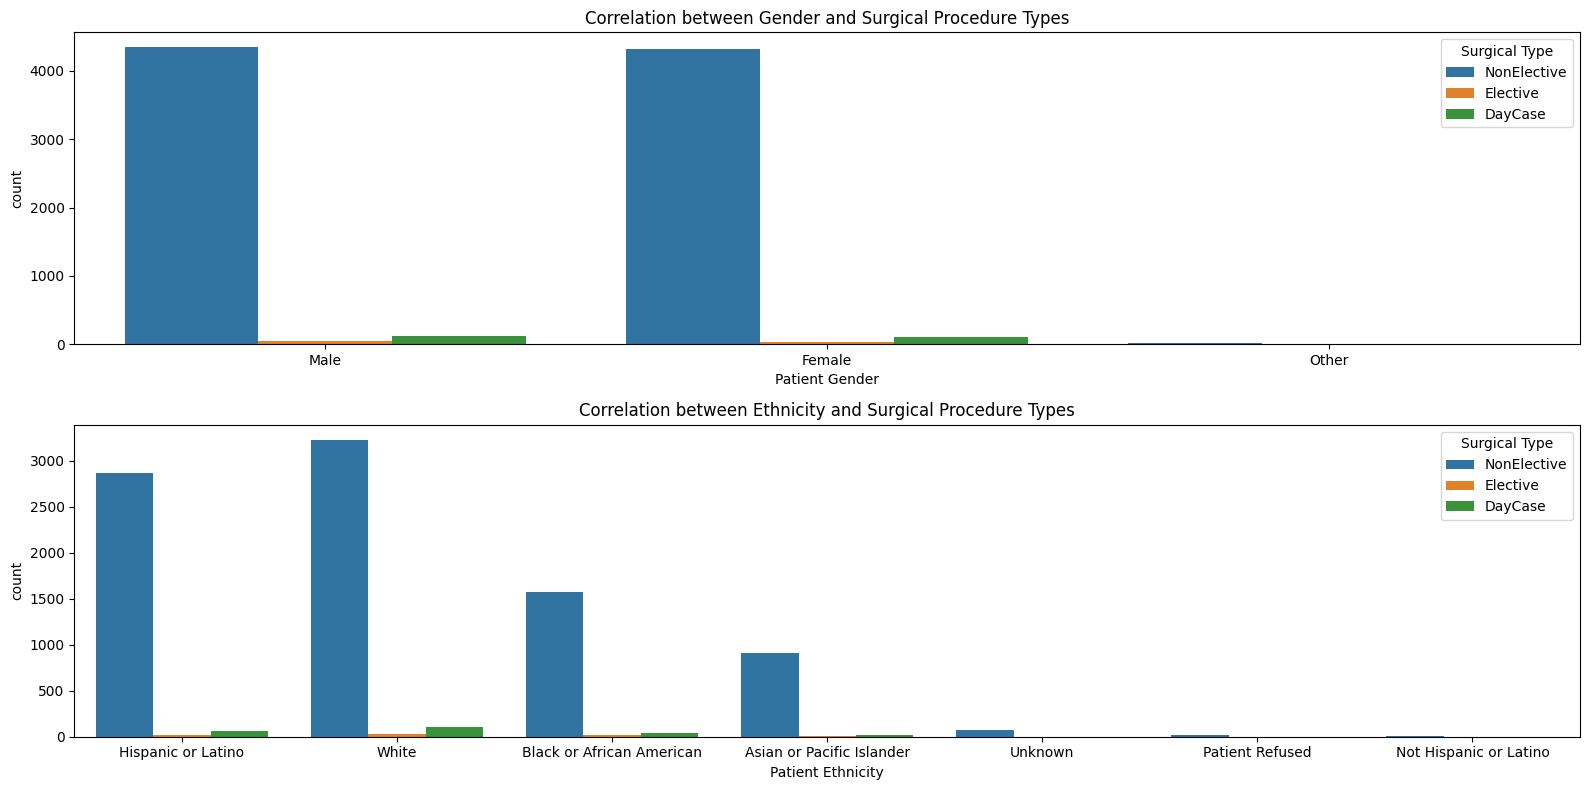

In [ ]:
# Analyze correlation between patient demographics and surgical procedure types
plt.figure(figsize=(16, 8))

# Gender vs. Procedure Type
plt.subplot(2, 1, 1)
sns.countplot(x='Patient Gender', hue='Surgical Type', data=merged_df)
plt.title('Correlation between Gender and Surgical Procedure Types')

# Ethnicity vs. Procedure Type
plt.subplot(2, 1, 2)
sns.countplot(x='Patient Ethnicity', hue='Surgical Type', data=merged_df)
plt.title('Correlation between Ethnicity and Surgical Procedure Types')

plt.tight_layout()
plt.show()


The graph indicates a high number of non-elective surgeries, it suggests that a **significant portion of the surgical procedures performed are urgent or emergency cases**. Here are marketing insights and potential promotional efforts based on this observation:

**Marketing Insights:**

1. **Immediate Need and Urgency:**
   - The high number of non-elective surgeries implies an immediate need for healthcare services. This insight highlights the critical role your company plays in addressing urgent medical conditions.

2. **Community Awareness:**
   - There may be a need to raise awareness within the community about the availability of your surgical solutions for emergency cases. Ensure that potential patients and referring healthcare providers are aware of your expertise in handling urgent surgical procedures.

3. **Emergency Preparedness:**
   - Emphasize your company's readiness and capacity to handle emergency surgeries. Highlight any specialized teams, facilities, or protocols in place to ensure a swift and effective response to urgent medical situations.

**Potential Promotional Efforts:**

1. **Community Outreach and Education:**
   - Conduct community outreach programs to educate the public about recognizing symptoms that may require immediate surgical intervention. Provide information on how your services can be accessed in emergency situations.

2. **Collaboration with Healthcare Providers:**
   - Strengthen partnerships with local healthcare providers, emergency rooms, and first responders. Ensure that they are aware of your company's capabilities and can refer patients in need of urgent surgical care.

3. **Digital and Traditional Marketing:**
   - Use a combination of digital and traditional marketing channels to communicate your company's expertise in handling emergency surgeries. This could include online advertising, social media campaigns, and informational brochures distributed to healthcare facilities.

4. **Highlight Specialized Services:**
   - If your company offers specialized services or surgical procedures that are particularly effective in emergency situations, highlight these in your promotional materials. Showcase success stories and testimonials from patients who benefited from timely interventions.

5. **Patient Support and Informational Resources:**
   - Develop informational resources for patients and their families facing emergency surgeries. This could include online guides, FAQs, and resources to help them understand the process and what to expect during and after the surgery.

Remember, the goal is to position your company as a trusted partner in addressing urgent healthcare needs within the community. Tailor your marketing efforts to emphasize the immediate availability, expertise, and compassion of your surgical services in emergency situations.

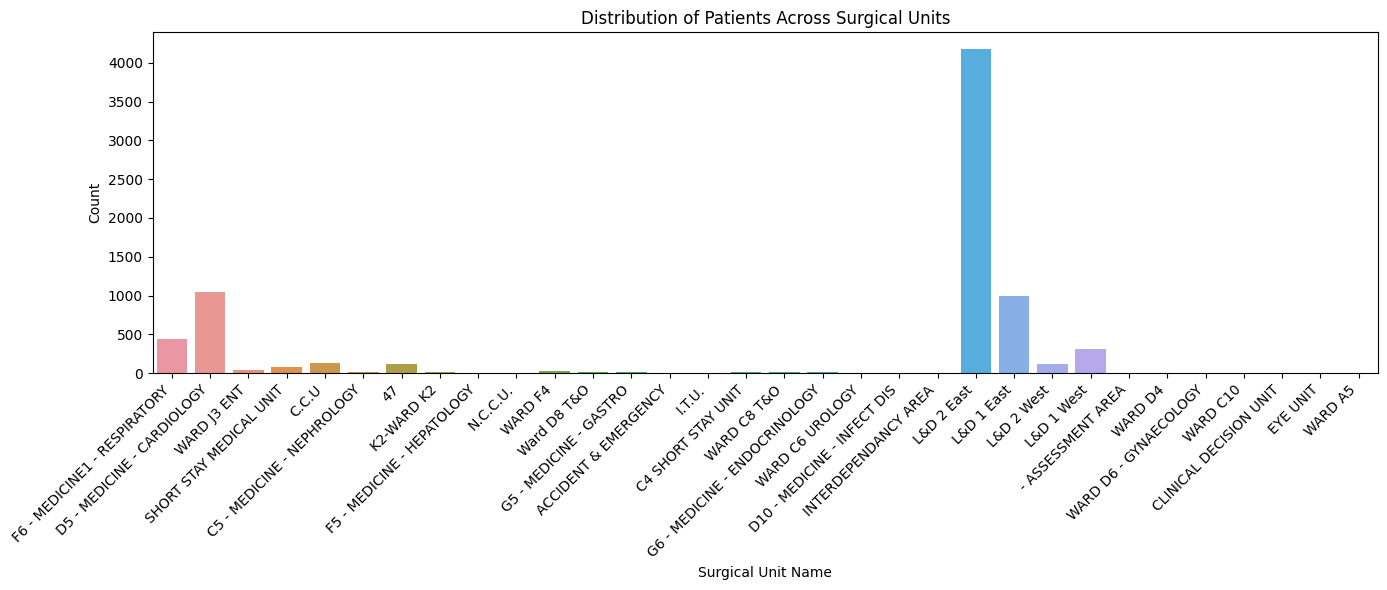

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Surgical Unit Name', data=merged_df)
plt.title('Distribution of Patients Across Surgical Units')
plt.xlabel('Surgical Unit Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


(-0.5, 799.5, 399.5, -0.5)

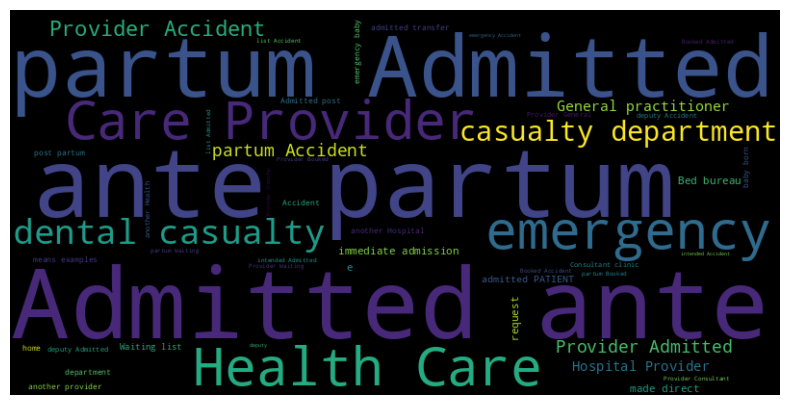

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=50).generate(' '.join(surgical_encounters_df['Surgical Admission Description']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [ ]:
surgical_encounters_df['Surgical Admission Group'].unique()

array(['Emergency admission, when admission is unpredictable and at short notice because of clinical need:',
       'Other admission not specified above',
       'Elective admission, when the DECISION TO ADMIT could be separated in time from the actual admission:',
       'Maternity admission, of a pregnant or recently pregnant woman to a maternity ward (including delivery facilities) except when the intention is to terminate the pregnancy'],
      dtype=object)

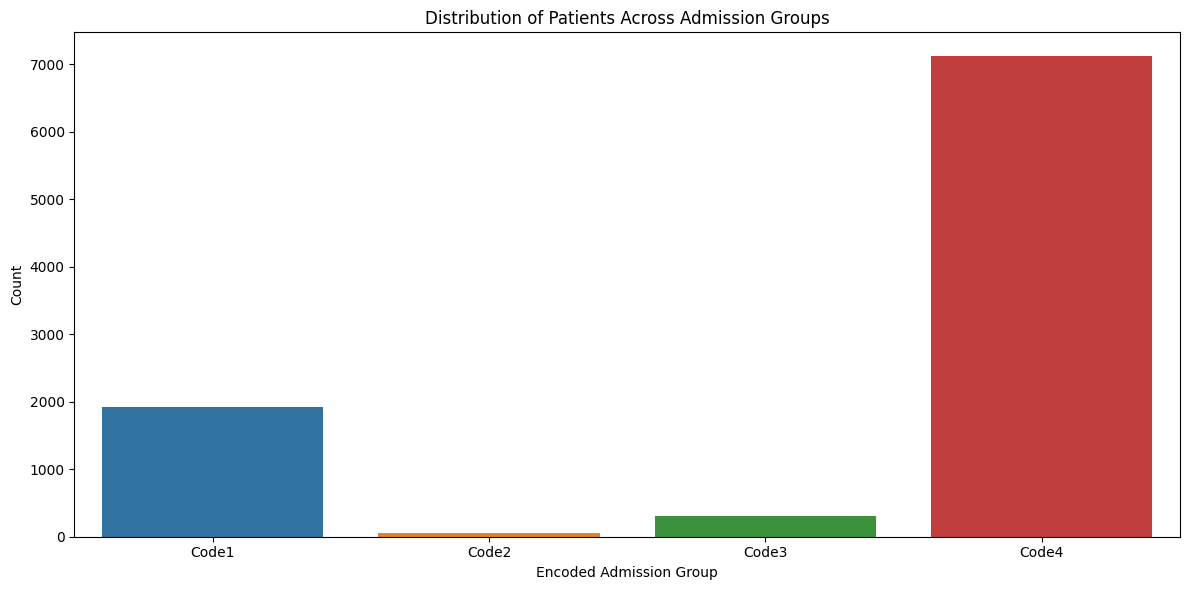

In [ ]:
# Assuming surgical_encounters_df is your DataFrame
# Create a mapping dictionary for encoding
encoding_dict = {
    'Emergency admission, when admission is unpredictable and at short notice because of clinical need:': 'Code1',
    'Other admission not specified above': 'Code2',
    'Elective admission, when the DECISION TO ADMIT could be separated in time from the actual admission:': 'Code3',
    'Maternity admission, of a pregnant or recently pregnant woman to a maternity ward (including delivery facilities) except when the intention is to terminate the pregnancy': 'Code4',
}

# Create a new column with encoded values
surgical_encounters_df['Encoded Admission Group'] = surgical_encounters_df['Surgical Admission Group'].map(encoding_dict)

# Plot the countplot with the encoded values
plt.figure(figsize=(12, 6))
sns.countplot(x='Encoded Admission Group', data=surgical_encounters_df)
plt.title('Distribution of Patients Across Admission Groups')
plt.xlabel('Encoded Admission Group')
plt.ylabel('Count')

# Display a legend or label to explain the encoded values
legend_labels = {v: k for k, v in encoding_dict.items()}

plt.tight_layout()
plt.show()


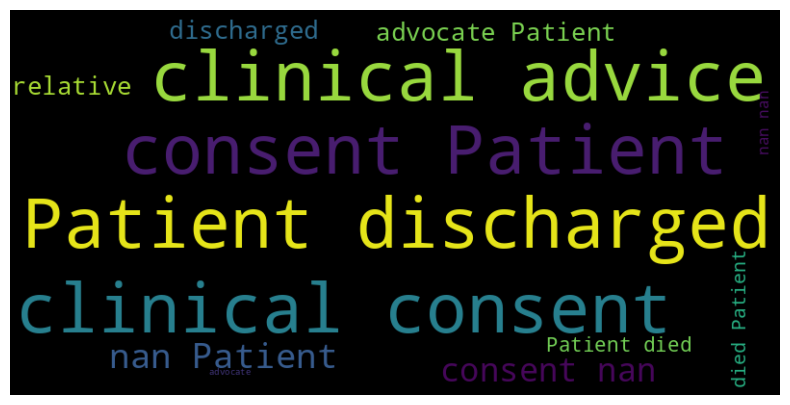

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming surgical_encounters_df is your DataFrame
# Convert the 'Surgical Discharge Description' column to strings
surgical_encounters_df['Surgical Discharge Description'] = surgical_encounters_df['Surgical Discharge Description'].astype(str)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=50).generate(' '.join(surgical_encounters_df['Surgical Discharge Description']))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()